# Decision tree Boston Dataset

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
data=pd.read_csv(r"E:\PYTHON\python Datasets\Boston1.csv")

In [63]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


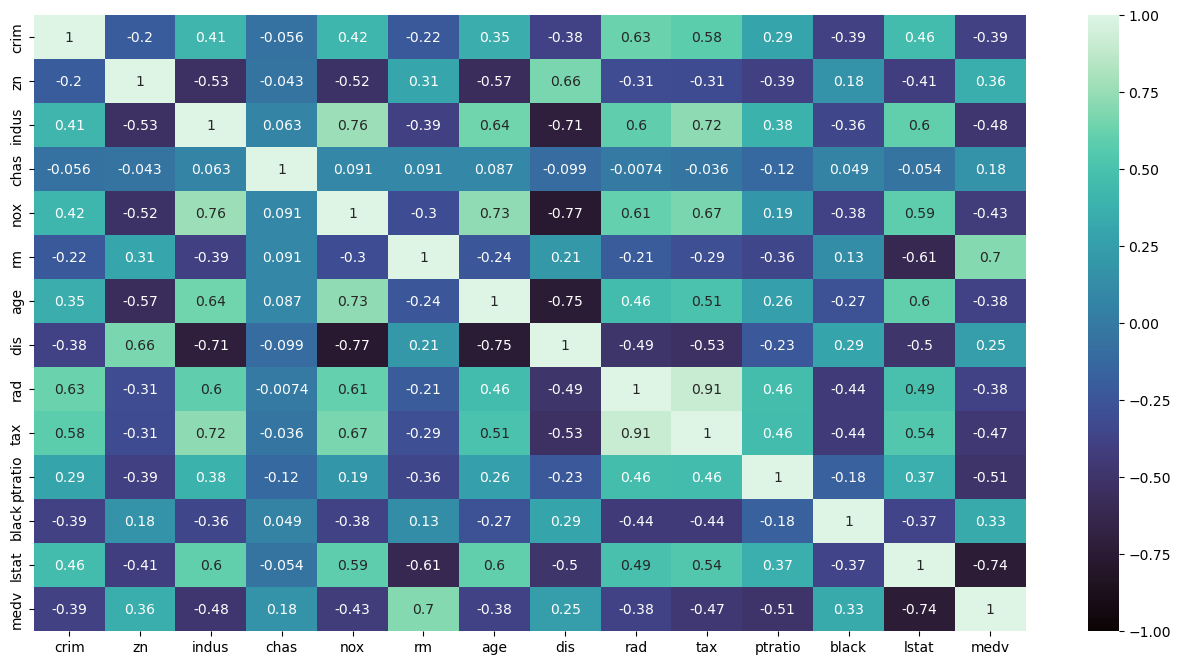

In [55]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True,cmap=sns.color_palette("mako", as_cmap=True),vmin=-1,vmax=1)
plt.show()

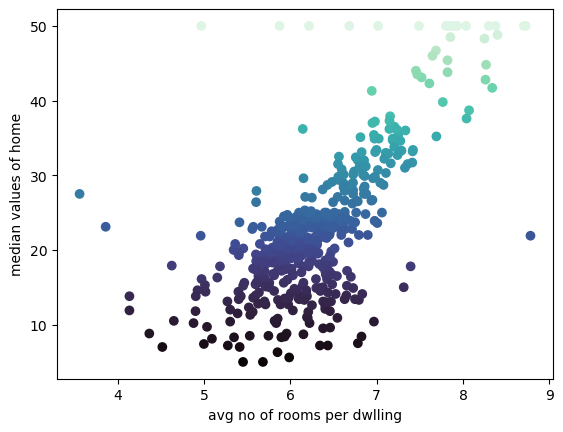

In [65]:
plt.scatter(data.rm,data.medv,c=data.medv,cmap=sns.color_palette("mako", as_cmap=True))
plt.xlabel('avg no of rooms per dwlling')
plt.ylabel('median values of home')
plt.show()

In [66]:
#univarite 
from sklearn.feature_selection import SelectKBest, f_regression

df = data.iloc[:,:]

result_df = pd.DataFrame(columns=['column_name', 'score'])

# Loop over all columns in the dataframe
for col_name in df.columns:
    X = df[[col_name]]
    y = df['medv']

    # Apply univariate feature selection to the current column
    selector = SelectKBest(score_func=f_regression, k=1)
    selector.fit(X, y)

    # Get the score of the selected feature
    score = selector.scores_[0]

    new_data = {'column_name': [col_name], 'score': [score]}
    new_df = pd.DataFrame(data=new_data)
    result_df = pd.concat([result_df, new_df], ignore_index=True)


result_df = result_df.sort_values(by='score', ascending=False)

In [67]:
result_df

,column_name,score
13,medv,3.242592e+17
12,lstat,6.016179e+02
5,rm,4.718467e+02
10,ptratio,1.751055e+02
2,indus,1.539549e+02
9,tax,1.417614e+02
4,nox,1.125915e+02
0,crim,8.948611e+01
8,rad,8.591428e+01
6,age,8.347746e+01


In [68]:
data.drop(columns=['dis','chas'],inplace=True)

#### separating data

In [69]:
y=pd.DataFrame(data.medv)
x=pd.DataFrame(data.drop('medv',axis=1))

In [70]:
display(x.head(),y.head())

,crim,zn,indus,nox,rm,age,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222,18.7,396.90,5.33


,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### train test

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=13)

#### Making Tree

In [81]:
#buliding model
from sklearn.tree import DecisionTreeRegressor
house_price=DecisionTreeRegressor()
house_price.fit(x_train,y_train)

DecisionTreeRegressor()

In [82]:
#predicting
y_pred=house_price.predict(x_test)

#### evaluation

In [83]:
from sklearn import metrics
print(f"Mean Abslote Error : {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {metrics.mean_squared_error(y_test,y_pred)}")
print(f"Root Mean Squared Error : {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")
print(f"R^2 : {metrics.r2_score(y_test,y_pred)}")

Mean Abslote Error : 2.7303921568627447
Mean Squared Error : 14.694803921568628
Root Mean Squared Error : 3.8333802213671198
R^2 : 0.8379144133213767


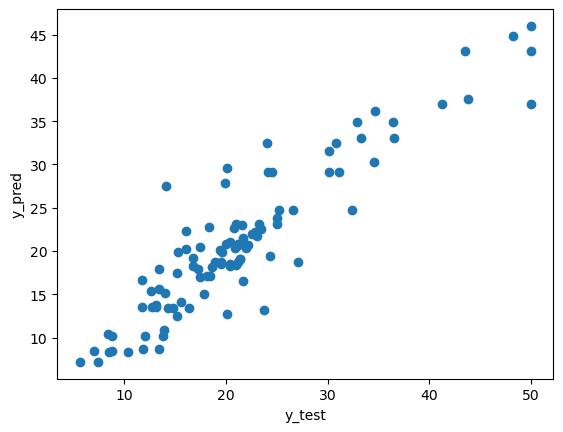

In [84]:
plt.scatter(y_test,y_pred,cmap=sns.color_palette("mako", as_cmap=True))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()